In [1]:
import json
import pandas as pd

<Axes: xlabel='yearbuilt', ylabel='locality'>

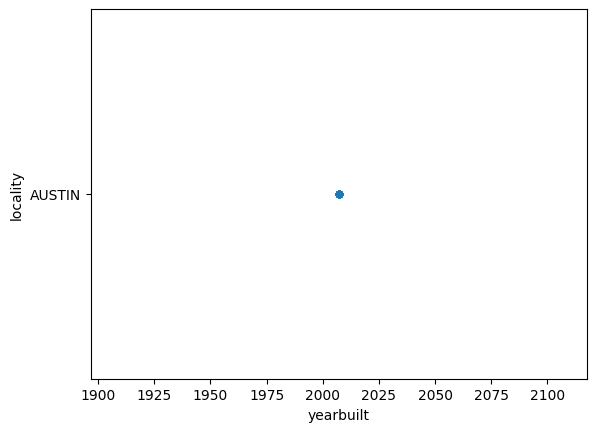

In [6]:
with open('data.json', 'r') as openfile:
 
    # Reading from json file
    data = json.load(openfile)
[x.pop("location") for x in data['property']]
[x.pop("lot") for x in data['property']]
[x.pop("vintage") for x in data['property']]
df=pd.DataFrame(columns=['countrySubd', 'locality', 'attomId','saleTransDate','proptype','yearbuilt'])
sales=pd.DataFrame(columns=['saleamt','attomId'])
for x in data['property']:
    temp=pd.DataFrame({'countrySubd':[x['address'].get('countrySubd')],
                        'locality':[x['address'].get('locality')],
                        'attomId':[x['identifier'].get('attomId')],
                        'saleTransDate':[x['sale'].get('saleTransDate')],
                        'proptype':[x['summary'].get('proptype')],
                        'yearbuilt':[x['summary'].get('yearbuilt')]})
    df=pd.concat([df,temp],ignore_index=True)
    temps=pd.DataFrame({'saleamt':[x['sale']['amount'].get('saleamt')],'attomId':[x['identifier'].get('attomId')]})
    sales=pd.concat([sales,temps],ignore_index=True)
df=df.dropna()
df.plot(x='yearbuilt',y='locality',kind='scatter')